In [85]:
%load_ext autoreload
%autoreload 2
from hamiltonians.utils.graph_utils import create_random_weighted_graph
from hamiltonians.problems import MaxCutProblem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### Defining the graph
Initialize a simple weighted graph where each edge has an initial weight between 0.1 and 1.0. Each edge has two additional parameters, initialized between -1.0 and 1.0 each.

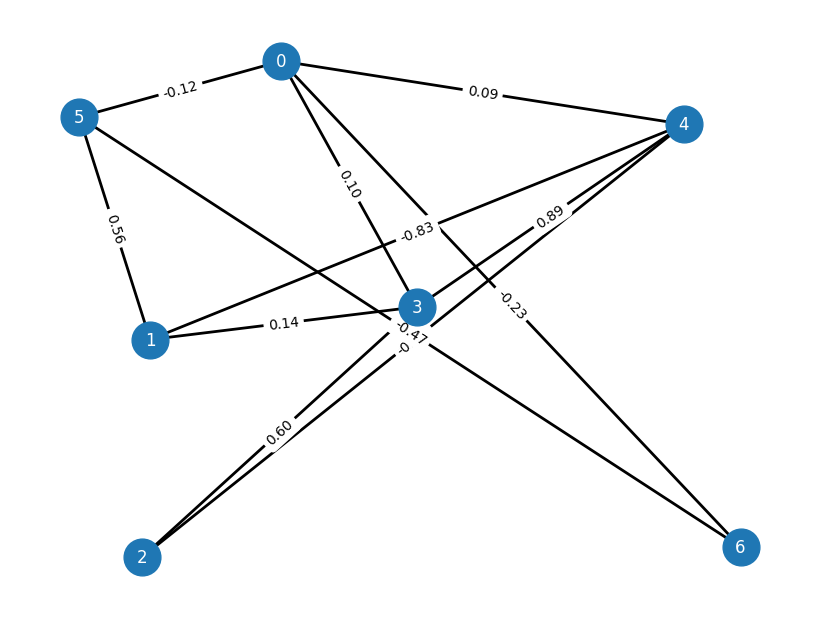

In [86]:
g = create_random_weighted_graph(n_nodes=7, edge_probability=0.6, n_edge_params=2, init_weight_range=(-1.0, 1.0), edge_param_range=(-1.0, 1.0), seed=0)
maxcut = MaxCutProblem(g)
maxcut.visualize_graph()

In [87]:
# We can see that each edge has an initial weight and two additional parameters edge_param_1 and edge_param_2
maxcut.graph.edges.data()

EdgeDataView([(0, 3, {'weight': 0.0976270078546495, 'edge_param_1': 0.43037873274483895, 'edge_param_2': 0.20552675214328775}), (0, 4, {'weight': 0.08976636599379373, 'edge_param_1': -0.15269040132219058, 'edge_param_2': 0.29178822613331223}), (0, 5, {'weight': -0.12482557747461498, 'edge_param_1': 0.7835460015641595, 'edge_param_2': 0.9273255210020586}), (0, 6, {'weight': -0.2331169623484446, 'edge_param_1': 0.5834500761653292, 'edge_param_2': 0.05778983950580896}), (1, 3, {'weight': 0.13608912218786462, 'edge_param_1': 0.8511932765853221, 'edge_param_2': -0.8579278836042261}), (1, 4, {'weight': -0.8257414005969186, 'edge_param_1': -0.9595632051193486, 'edge_param_2': 0.665239691095876}), (1, 5, {'weight': 0.556313501899701, 'edge_param_1': 0.7400242964936383, 'edge_param_2': 0.957236684465528}), (2, 3, {'weight': 0.5983171284334472, 'edge_param_1': -0.07704127549413631, 'edge_param_2': 0.5610583525729109}), (2, 4, {'weight': -0.7634511482621336, 'edge_param_1': 0.27984204265504764, '

### Solving Classically
We include the option to solve the Weighted MaxCut problem classically, currently through brute force. Also, we include visualization options to analyse the optimal solution.

In [96]:
maxcut.solve_classically()

{'bitstring': '0110100',
 'assignment': {0: 0, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0},
 'partition': [[0, 3, 5, 6], [1, 2, 4]],
 'cut_value': 2.269823952613974}

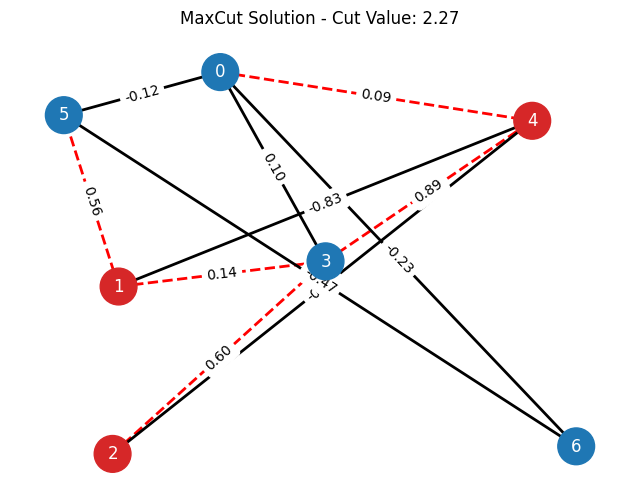

In [97]:
maxcut.visualize_solution(maxcut.solutions['brute_force'])

### Generating the Corresponding Hamiltonian
Using the current MaxCut configuration (i.e. the current edge weight values), it is possible to easily build a Hamiltonian and convert it to PennyLane. Qiskit support is on the way :)

In [98]:
maxcut.build_hamiltonian()
print(maxcut.hamiltonian)
# maxcut.hamiltonian.to_pennylane()

- 0.049 * Z0@Z3 - 0.045 * Z0@Z4 + 0.062 * Z0@Z5 + 0.117 * Z0@Z6 - 0.068 * Z1@Z3 + 0.413 * Z1@Z4 - 0.278 * Z1@Z5 - 0.299 * Z2@Z3 + 0.382 * Z2@Z4 - 0.445 * Z3@Z4 + 0.235 * Z5@Z6 - 0.025


### Modifying Problem Configuration
To model different Hamiltonian parametrizations, it is possible to select from a variety of "modifier functions". This functions, specific to each problem class, can be used to alter the problem configuration (in this case the edge weights). Upon modifying the edge weights, a new hamiltonian is calculated automatically.

In [91]:
maxcut.print_modifier_functions(verbose=True)


Available modifier functions for MaxCut:
  * linear

    Code: lambda value_to_be_modified, param: value_to_be_modified + param,
----------------------------------------

  * quadratic

    Code: lambda value_to_be_modified, param: value_to_be_modified + param ** 2,
----------------------------------------

  * qubic

    Code: lambda value_to_be_modified, param: value_to_be_modified + param ** 3,
----------------------------------------

  * exponential

    Code: lambda value_to_be_modified, param: value_to_be_modified + np.exp(param),
----------------------------------------

  * linear_edge_scaling

    Code: def linear_edge_scaling(weight: float, scaling_factor: float, edge_param: float) -> float:
    """
    Apply a linear formula to scale the edge weights:
    weight = weight + edge_param * scaling_factor
    
    Args:
        weight: Original edge weight
        scaling_factor: Factor for all polynomial terms
        edge_param: Edge parameter for the linear term

    Returns

In [99]:
maxcut.modify_parameters("quadratic_edge_scaling", scaling_factor=0.5)
maxcut.print_hamiltonian()


MaxCut Hamiltonian:
- 0.182 * Z0@Z3 - 0.043 * Z0@Z4 - 0.249 * Z0@Z5 - 0.037 * Z0@Z6 - 0.174 * Z1@Z3 + 0.570 * Z1@Z4 - 0.583 * Z1@Z5 - 0.350 * Z2@Z3 + 0.401 * Z2@Z4 - 0.434 * Z3@Z4 + 0.109 * Z5@Z6 + 0.972


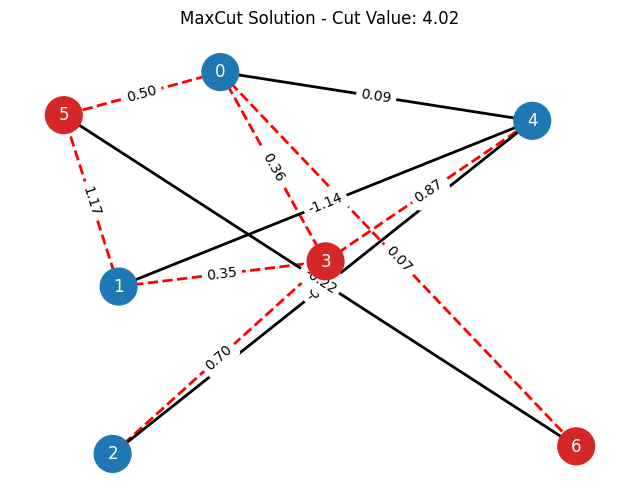

In [100]:
# Accordingly, the optimal solution might change
maxcut.solve_classically()
maxcut.visualize_solution(maxcut.solutions['brute_force'])

In [101]:
# Finally, the MaxCut problem parameters (edge weights) can be either modified again through another function or reset to the original values.
maxcut.reset_parameters()

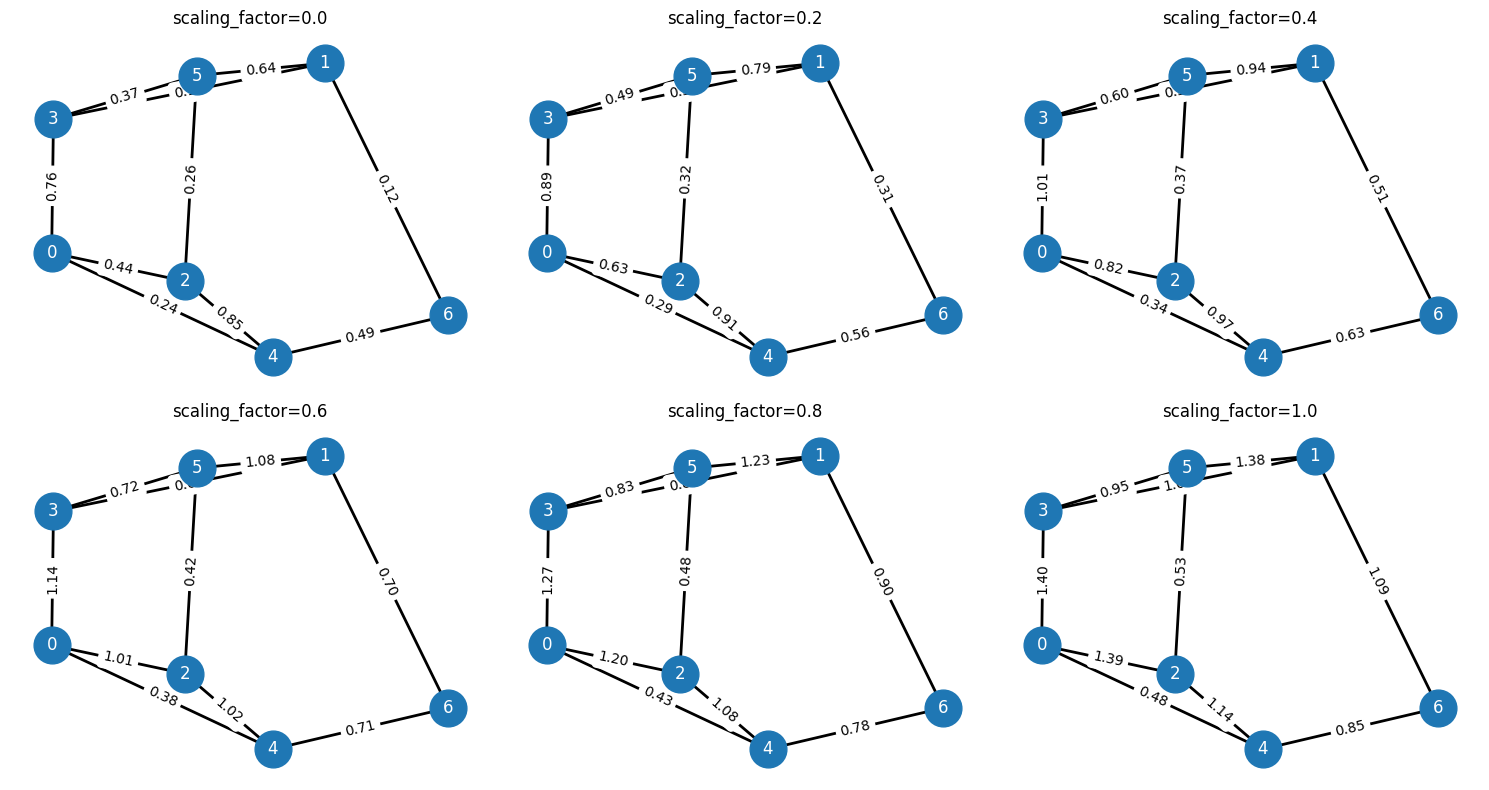

In [12]:
import matplotlib.pyplot as plt

scaling_factors = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
n = len(scaling_factors)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))
axes = axes.flatten()

for idx, scaling in enumerate(scaling_factors):
    maxcut.reset_parameters()
    maxcut.modify_parameters("linear_edge_scaling", scaling_factor=scaling)
    plt.sca(axes[idx])
    maxcut.draw_graph()
    axes[idx].set_title(f"scaling_factor={scaling}")

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()